<a href="https://colab.research.google.com/github/fahmida0404/network-threat-detection/blob/main/notebooks/NSL_KDD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Importing Libraries**

In [42]:
import zipfile
import os
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from sklearn.metrics import  make_scorer, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

### **Data Collection**

In [2]:
path = "/content/drive/MyDrive/IDS/Dataset/NSL-KDD.zip" #zip file path
dataset = "/content/NSL-KDD" #dataset path

# unzip and extract files
if not os.path.exists(dataset):
  !mkdir -p {dataset}
  !unzip -j {path} -d {dataset}

Archive:  /content/drive/MyDrive/IDS/Dataset/NSL-KDD.zip
  inflating: /content/NSL-KDD/kdd_test.csv  
  inflating: /content/NSL-KDD/kdd_train.csv  


In [3]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [4]:
data=pd.read_csv("/content/NSL-KDD/kdd_train.csv",header=None,names=col_names,skiprows=1)

In [5]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [6]:
data.shape

(125973, 42)

In [7]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [8]:
data.isnull().sum()

,0
duration,0
protocol_type,0
service,0
flag,0
src_bytes,0
dst_bytes,0
land,0
wrong_fragment,0
urgent,0
hot,0


### **Data Preprocessing**

In [9]:
data= data.drop_duplicates(keep='first')
print("Duplicates:", data.duplicated().sum())

Duplicates: 0


In [10]:
# Check columns with constant values (only 1 unique value)
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
print("Columns with constant values:", constant_columns)
data = data.drop(constant_columns, axis=1)

Columns with constant values: ['num_outbound_cmds']


In [11]:
for col_name in data.columns:
    if data[col_name].dtypes == 'object' :
        unique_cat = len(data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'protocol_type' has 3 categories
Feature 'service' has 70 categories
Feature 'flag' has 11 categories
Feature 'label' has 23 categories


In [12]:
data["label"].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [13]:
# Replace all attack types with "Malicious" except "normal"
data['label'] = data['label'].apply(lambda x: "Malicious" if x != "normal" else x)

In [14]:
data['label'] = data['label'].apply(lambda x: "Benign" if x == "normal" else x)

In [15]:
data["label"].value_counts()

,count
label,
Benign,67343
Malicious,58630


In [16]:
cols = ['protocol_type','service','flag','label']

for i in cols:
    en = LabelEncoder()

    data[i] = en.fit_transform(data[i])

In [17]:
data["label"].value_counts()

,count
label,
0,67343
1,58630


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 41 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  int64  
 2   service                      125973 non-null  int64  
 3   flag                         125973 non-null  int64  
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [19]:
X = data.drop('label', axis=1)
y = data['label']

**Train-Test Split**

In [20]:
X_trainval, X_test, y_trainval, y_test  = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [21]:
X_trainval.shape

(100778, 40)

In [22]:
X_test.shape

(25195, 40)

In [23]:
y_trainval.value_counts()

,count
label,
0,53874
1,46904


In [24]:
y_test.value_counts()

,count
label,
0,13469
1,11726


**Feature Scaling**

In [25]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the feature data and transform it
X_trainval = pd.DataFrame(scaler.fit_transform(X_trainval), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [26]:
X_trainval.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,0.5,0.347826,0.9,2.391367e-07,5.473544e-07,0.0,0.0,0.0,0.0,...,0.960784,1.000000,1.0,0.0,0.00,0.01,0.0,0.0,0.0,0.0
1,0.000023,0.5,0.782609,0.9,9.420536e-07,2.809295e-07,0.0,0.0,0.0,0.0,...,0.039216,0.321569,1.0,0.0,0.10,0.02,0.0,0.0,0.0,0.0
2,0.000233,0.5,0.347826,0.9,1.405834e-07,7.287669e-04,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0
3,0.000000,0.5,0.347826,0.9,2.137737e-07,3.549788e-07,0.0,0.0,0.0,0.0,...,0.270588,1.000000,1.0,0.0,0.01,0.04,0.0,0.0,0.0,0.0
4,0.000000,0.5,0.347826,0.9,2.282668e-07,3.526886e-07,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0


In [27]:
X_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.0,0.5,0.072464,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,1.000000,0.019608,0.02,0.05,0.0,0.00,1.0,1.0,0.0,0.0
1,0.0,0.5,0.347826,0.9,1.536272e-07,3.478029e-06,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0
2,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,1.000000,0.074510,0.07,0.08,0.0,0.00,1.0,1.0,0.0,0.0
3,0.0,0.5,0.710145,0.5,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,1.000000,0.007843,0.01,0.08,0.0,0.00,1.0,1.0,0.0,0.0
4,0.0,0.5,0.347826,0.9,2.297162e-07,6.534663e-07,0.0,0.0,0.0,0.0,...,0.862745,1.000000,1.00,0.00,0.0,0.02,0.0,0.0,0.0,0.0


### **Feature Selection**

In [28]:
ig = mutual_info_classif(X_trainval, y_trainval)

In [29]:
# Create a dictionary of feature importance scores
feature_scores = {}
for i in range(len(X.columns)):
    feature_scores[X.columns[i]] = ig[i]

# Sort the features by importance score in descending order
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print all feature importance scores
print("Feature Importance Scores:")
for feature, score in sorted_features:
    print(f"{feature}: {score:.3f}")

Feature Importance Scores:
src_bytes: 0.566
service: 0.469
dst_bytes: 0.439
flag: 0.369
same_srv_rate: 0.368
diff_srv_rate: 0.360
dst_host_srv_count: 0.336
dst_host_same_srv_rate: 0.311
logged_in: 0.289
dst_host_diff_srv_rate: 0.288
dst_host_serror_rate: 0.286
dst_host_srv_serror_rate: 0.280
serror_rate: 0.277
srv_serror_rate: 0.267
count: 0.265
dst_host_srv_diff_host_rate: 0.189
dst_host_count: 0.145
dst_host_same_src_port_rate: 0.133
srv_diff_host_rate: 0.097
srv_count: 0.063
dst_host_srv_rerror_rate: 0.062
protocol_type: 0.053
rerror_rate: 0.041
dst_host_rerror_rate: 0.037
srv_rerror_rate: 0.036
duration: 0.028
hot: 0.010
wrong_fragment: 0.006
num_compromised: 0.003
num_failed_logins: 0.001
num_root: 0.001
is_guest_login: 0.001
land: 0.001
is_host_login: 0.001
root_shell: 0.001
su_attempted: 0.001
num_file_creations: 0.000
urgent: 0.000
num_shells: 0.000
num_access_files: 0.000


In [30]:
threshold = 0.05
selected_features = [column for column in feature_scores.keys() if feature_scores[column]>=threshold]
# Select features only in dataframe
X_trainval = X_trainval[selected_features]
X_test = X_test[selected_features]

In [31]:
X_trainval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100778 entries, 0 to 100777
Data columns (total 22 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   protocol_type                100778 non-null  float64
 1   service                      100778 non-null  float64
 2   flag                         100778 non-null  float64
 3   src_bytes                    100778 non-null  float64
 4   dst_bytes                    100778 non-null  float64
 5   logged_in                    100778 non-null  float64
 6   count                        100778 non-null  float64
 7   srv_count                    100778 non-null  float64
 8   serror_rate                  100778 non-null  float64
 9   srv_serror_rate              100778 non-null  float64
 10  same_srv_rate                100778 non-null  float64
 11  diff_srv_rate                100778 non-null  float64
 12  srv_diff_host_rate           100778 non-null  float64
 13 

In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25195 entries, 0 to 25194
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   protocol_type                25195 non-null  float64
 1   service                      25195 non-null  float64
 2   flag                         25195 non-null  float64
 3   src_bytes                    25195 non-null  float64
 4   dst_bytes                    25195 non-null  float64
 5   logged_in                    25195 non-null  float64
 6   count                        25195 non-null  float64
 7   srv_count                    25195 non-null  float64
 8   serror_rate                  25195 non-null  float64
 9   srv_serror_rate              25195 non-null  float64
 10  same_srv_rate                25195 non-null  float64
 11  diff_srv_rate                25195 non-null  float64
 12  srv_diff_host_rate           25195 non-null  float64
 13  dst_host_count  

### **Evaluation metrics**

In [33]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) #5 fold cv

In [34]:
def tnr_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

def fpr_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fp / (fp + tn)

def fnr_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return fn / (fn + tp)

In [35]:
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'tpr': make_scorer(recall_score),  # TPR = recall for class 1
    'tnr': make_scorer(tnr_score), # TNR for class 0
    'fpr': make_scorer(fpr_score),
    'fnr': make_scorer(fnr_score),
    'f1_score': make_scorer(f1_score),  # F1-score for class 1
}

### **XGBoost**

In [36]:
XGB = XGBClassifier(n_estimators=3, max_depth=3, eta=0.2, alpha=1, random_state=42, n_jobs=-1)

In [37]:
start_time = time.time()
results = cross_validate(XGB, X_trainval, y_trainval, cv=skf, scoring=scoring, n_jobs=-1) #Obtain evaluation metrics

# Display average scores across all folds
print("\nAverage Accuracy:", results['test_accuracy'].mean())
print("Average Sensitivity (TPR):", results['test_tpr'].mean())
print("Average Specificity (TNR):", results['test_tnr'].mean())
print("Average FPR:", results['test_fpr'].mean())
print("Average FNR: ", results['test_fnr'].mean())
print("Average F1-score:", results['test_f1_score'].mean())

end_time = time.time()
execution_time = end_time - start_time
print("\nExecution Time:", execution_time, "seconds")
print("\nExecution Time:", execution_time/60, "minutes")


Average Accuracy: 0.9728115213859804
Average Sensitivity (TPR): 0.974032132725745
Average Specificity (TNR): 0.9717490874525208
Average FPR: 0.02825091254747939
Average FNR:  0.025967867274255062
Average F1-score: 0.9709023655815283

Execution Time: 4.1709303855896 seconds

Execution Time: 0.06951550642649333 minutes


In [38]:
start_time = time.time()

XGB.fit(X_trainval, y_trainval)
y_pred = XGB.predict(X_test)
y_pred_proba = XGB.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
tpr = recall_score(y_test, y_pred)
tnr = tnr_score(y_test, y_pred)
fpr = fpr_score(y_test, y_pred)
fnr = fnr_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Sensitivity (TPR):", tpr)
print("Specificity (TNR):", tnr)
print("FPR:", fpr)
print("FNR:", fnr)
print("F1-score:", f1)

end_time = time.time()
execution_time = end_time - start_time
print("\nExecution Time:", execution_time, "seconds")
print("\nExecution Time:", execution_time/60, "minutes")

Accuracy: 0.9712641397102599
Sensitivity (TPR): 0.9754391949513901
Specificity (TNR): 0.9676293711485634
FPR: 0.032370628851436635
FNR: 0.024560805048609927
F1-score: 0.9693220338983051

Execution Time: 0.3501293659210205 seconds

Execution Time: 0.005835489432017008 minutes


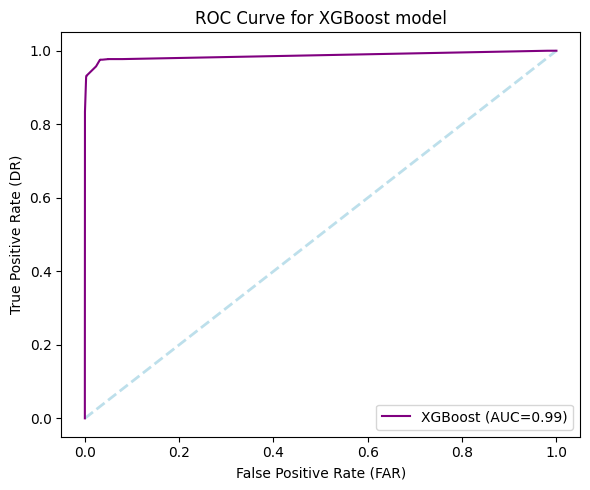

In [45]:
plt.figure(figsize=(6, 5))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='lightblue', alpha=0.8)

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"XGBoost (AUC={auc_score:.2f})", color="purple")

plt.title("ROC Curve for XGBoost model")
plt.xlabel('False Positive Rate (FAR)')
plt.ylabel('True Positive Rate (DR)')
plt.legend()

plt.tight_layout()
plt.show()